In [9]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [10]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [11]:
data_path = "../data/mnist/"

In [12]:
trainset = datasets.MNIST(data_path, download=True, train=True, transform=transform)
valset = datasets.MNIST(data_path, download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

9920512it [00:06, 1526216.10it/s]                             


Extracting ../data/mnist/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 116935.39it/s]           


Extracting ../data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:00, 1679622.92it/s]                            


Extracting ../data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 40967.71it/s]            


Extracting ../data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


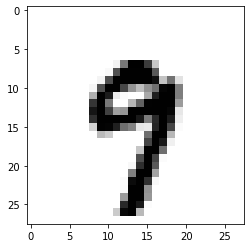

In [14]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

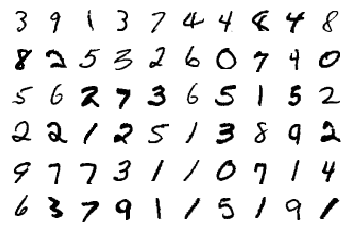

In [15]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [20]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [21]:
model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/600], Loss: 0.1032, Accuracy: 98.00%
Epoch [1/5], Step [200/600], Loss: 0.0792, Accuracy: 98.00%
Epoch [1/5], Step [300/600], Loss: 0.0874, Accuracy: 97.00%
Epoch [1/5], Step [400/600], Loss: 0.0544, Accuracy: 99.00%
Epoch [1/5], Step [500/600], Loss: 0.0973, Accuracy: 96.00%
Epoch [1/5], Step [600/600], Loss: 0.0777, Accuracy: 98.00%
Epoch [2/5], Step [100/600], Loss: 0.0822, Accuracy: 97.00%
Epoch [2/5], Step [200/600], Loss: 0.0337, Accuracy: 98.00%
Epoch [2/5], Step [300/600], Loss: 0.0098, Accuracy: 100.00%
Epoch [2/5], Step [400/600], Loss: 0.0993, Accuracy: 97.00%
Epoch [2/5], Step [500/600], Loss: 0.0574, Accuracy: 98.00%
Epoch [2/5], Step [600/600], Loss: 0.2487, Accuracy: 93.00%
Epoch [3/5], Step [100/600], Loss: 0.0605, Accuracy: 97.00%
Epoch [3/5], Step [200/600], Loss: 0.0191, Accuracy: 99.00%
Epoch [3/5], Step [300/600], Loss: 0.0137, Accuracy: 100.00%
Epoch [3/5], Step [400/600], Loss: 0.1387, Accuracy: 95.00%
Epoch [3/5], Step [500/600], Loss: 0.1

In [23]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 99.15 %
